In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import yfinance as yf


In [3]:
#Variables below can be reused in the future, if creating dashboards/can also easily change the stocks selected.
stock1 = "AAPL"
stock2 = "WTI"

df = yf.download([stock1,stock2])

[*********************100%***********************]  2 of 2 completed


Taking a look at the first few rows of the dataframe, are we missing any values, are there any anomolies, are the dates in the correct order and what kind of column names do we have?

In [39]:
df.head()


Adj Close         Close          High           Low          Open  \
                AAPL WTI      AAPL WTI      AAPL WTI      AAPL WTI      AAPL   
Date                                                                           
1980-12-12  0.100453 NaN  0.128348 NaN  0.128906 NaN  0.128348 NaN  0.128348   
1980-12-15  0.095213 NaN  0.121652 NaN  0.122210 NaN  0.121652 NaN  0.122210   
1980-12-16  0.088224 NaN  0.112723 NaN  0.113281 NaN  0.112723 NaN  0.113281   
1980-12-17  0.090408 NaN  0.115513 NaN  0.116071 NaN  0.115513 NaN  0.115513   
1980-12-18  0.093029 NaN  0.118862 NaN  0.119420 NaN  0.118862 NaN  0.118862   

                   Volume      
           WTI       AAPL WTI  
Date                           
1980-12-12 NaN  469033600 NaN  
1980-12-15 NaN  175884800 NaN  
1980-12-16 NaN  105728000 NaN  
1980-12-17 NaN   86441600 NaN  
1980-12-18 NaN   73449600 NaN

Same as above, execept looking at the last few rows of the dataframe, we can see that the dataframe is sorted in ascending order (latest values at the bottom of the table)

In [40]:
df.tail()

Adj Close              Close               High          \
                  AAPL    WTI        AAPL    WTI        AAPL     WTI   
Date                                                                   
2021-12-23  176.279999  3.310  176.279999  3.310  176.850006  3.3800   
2021-12-27  180.330002  3.420  180.330002  3.420  180.419998  3.4400   
2021-12-28  179.289993  3.380  179.289993  3.380  181.330002  3.5400   
2021-12-29  179.380005  3.300  179.380005  3.300  180.630005  3.4400   
2021-12-30  179.630005  3.295  179.630005  3.295  180.565002  3.3699   

                   Low               Open          Volume             
                  AAPL    WTI        AAPL   WTI      AAPL        WTI  
Date                                                                  
2021-12-23  175.270004  3.300  175.850006  3.33  68227500  1146800.0  
2021-12-27  177.070007  3.220  177.089996  3.31  74919600  1659300.0  
2021-12-28  178.529999  3.370  180.160004  3.44  79144300  1010500.0  
2021-12-29  178.139999  3.290  179.330002  3.44  62231200  1107200.0  
2021-12-30  178.889999  3.285  179.470001  3.33  29841238   528901.0

Getting rid of Na values from the start of the dataframe, we could also simply specifiy a date range to collect data from.

In [4]:
df.dropna(inplace= True)

Plot the the dataframe above on a graph for a more visual look at the data provided.

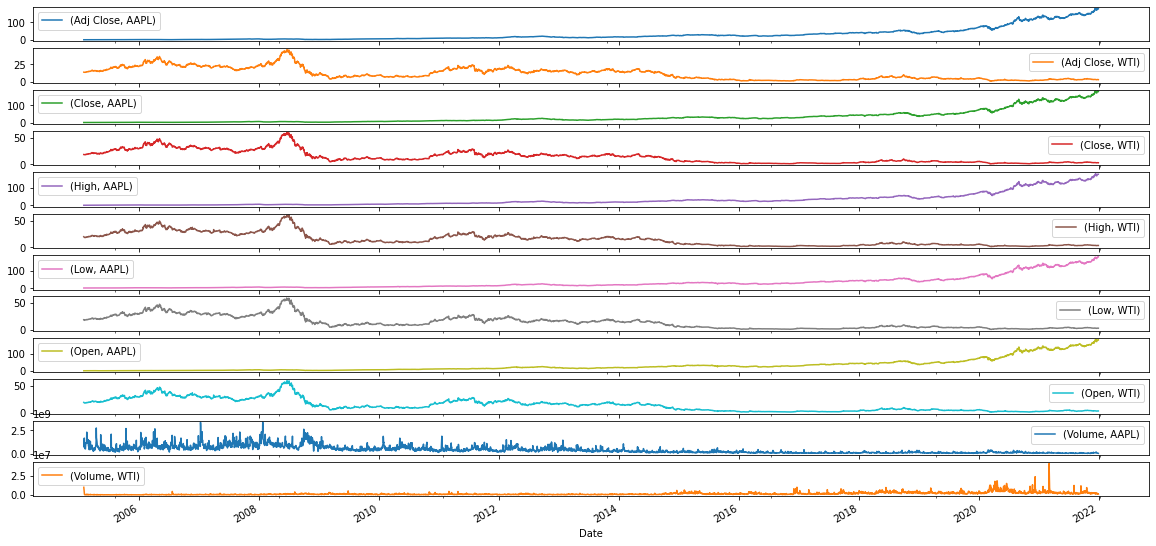

In [5]:
df.plot( subplots = True, figsize = ( 20 , 10));

A lot of information is presented, so it may be easier to simply look at one set of data for both stocks, i.e. Adjusted Close

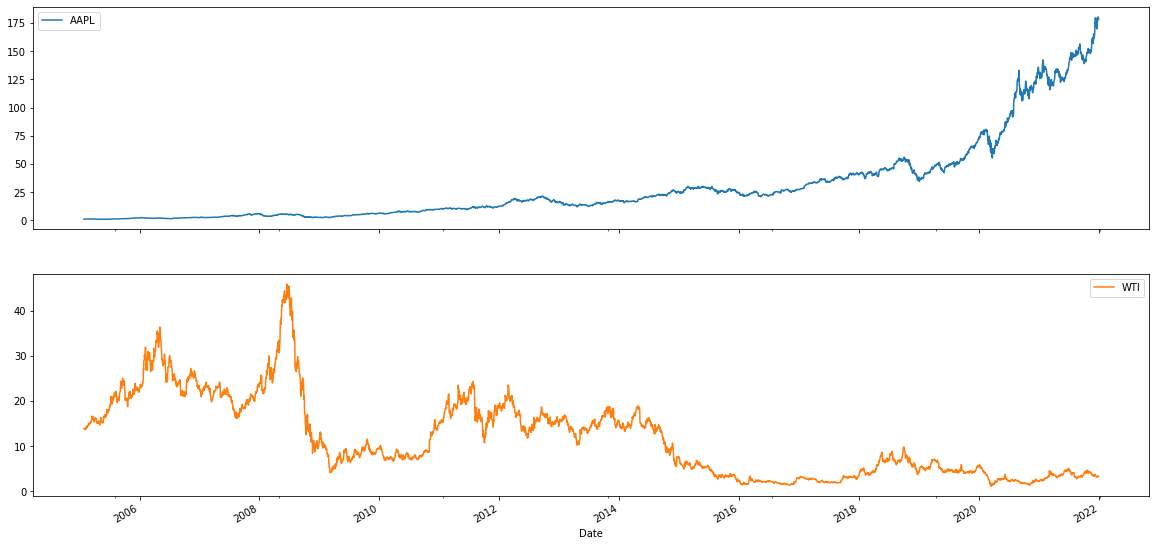

In [6]:
df["Adj Close"].plot( subplots = True, figsize = ( 20 , 10));

Updating the DF variable so that we are only looking at the "Adj Close" column from the data frame.

In [7]:
df = df["Adj Close"]

Also setting the timeframe at which we want to look at the data from, i.e. 2010 to 2019 (in order to exclude the COVID-19 Black Swan event)

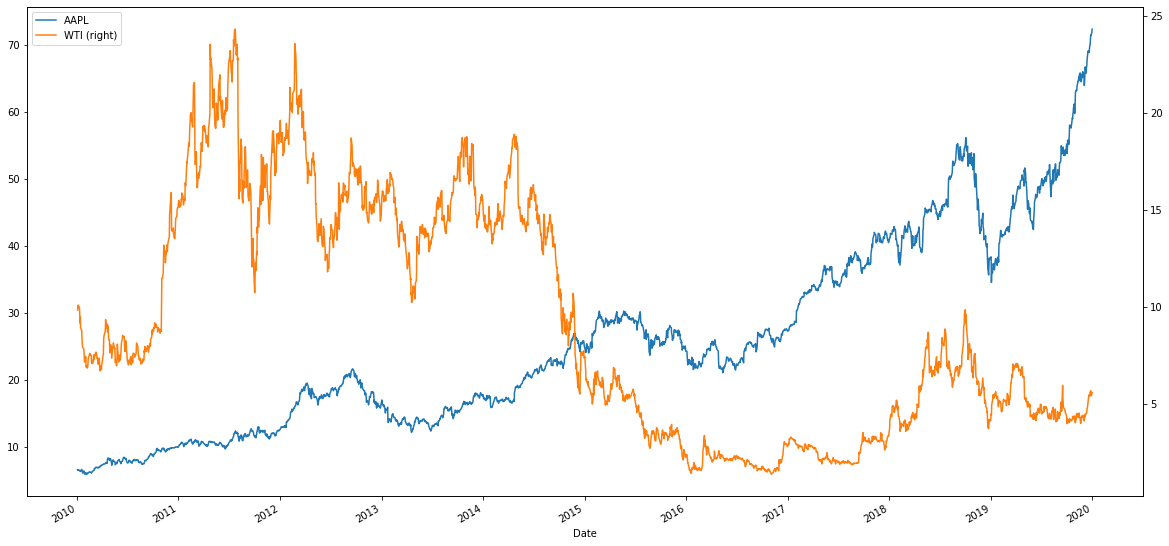

In [8]:
df.loc[ "2010": " 2019" ].plot(secondary_y = stock2 , figsize = (20,10));

Setting Time Window

In [9]:
df_time_window = df.loc[ "2010": "2019"]

Calulating the logarithmic returns for the stocks in the provided time window. Graph shows the daily returns of each stock for the given time window.


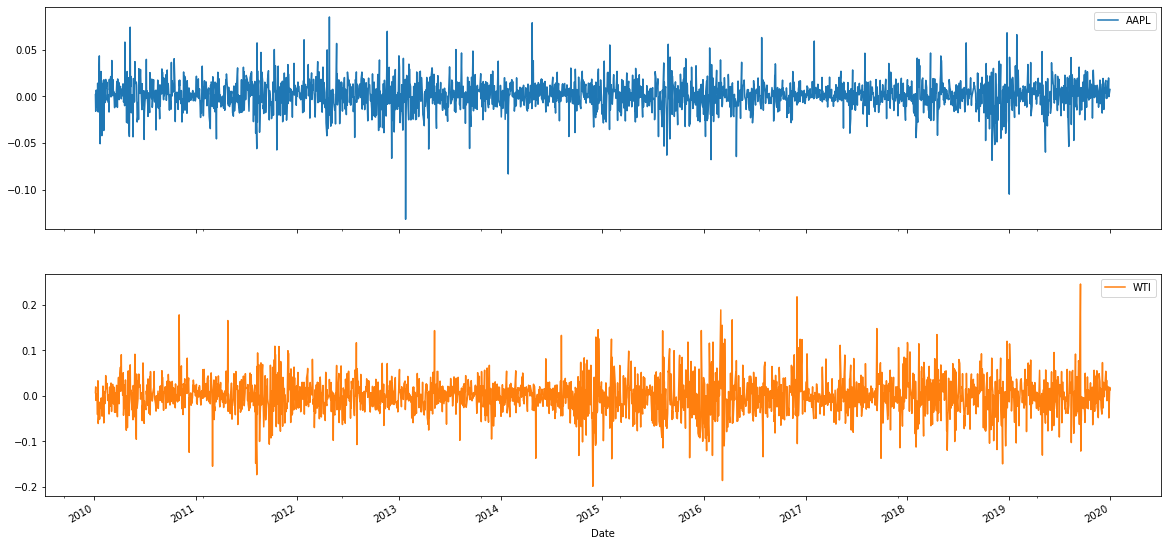

In [11]:
returns = np.log(df_time_window / df_time_window.shift(1))
returns.dropna(inplace = True)
returns.plot(subplots = True, figsize = (20,10));


Creating a scatter matrix and a histogram, this allows us to take a better look at the correlation between stocks.

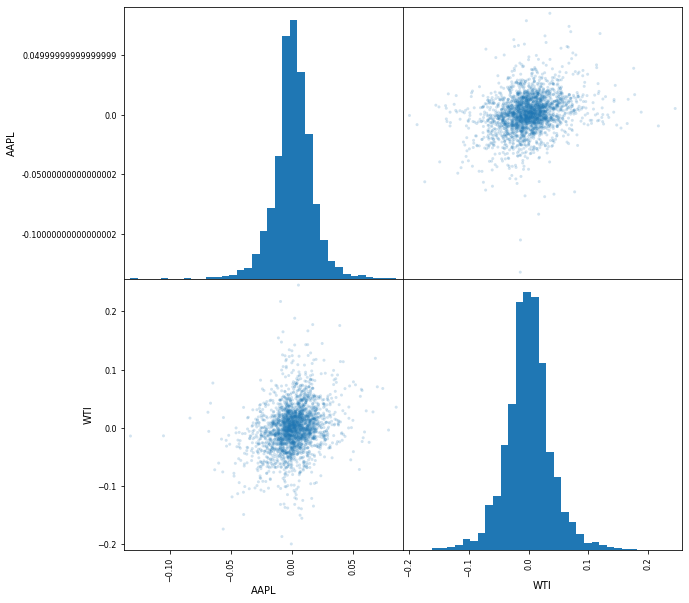

In [19]:
pd.plotting.scatter_matrix(returns,
                            alpha = 0.2,
                            hist_kwds = {"bins":35},
                            figsize = (10,10));

The graph above doesn't seem to show much correlation at all. 


Below will use an OLS regression in order to try and if there is any correlation.

OLS Regression

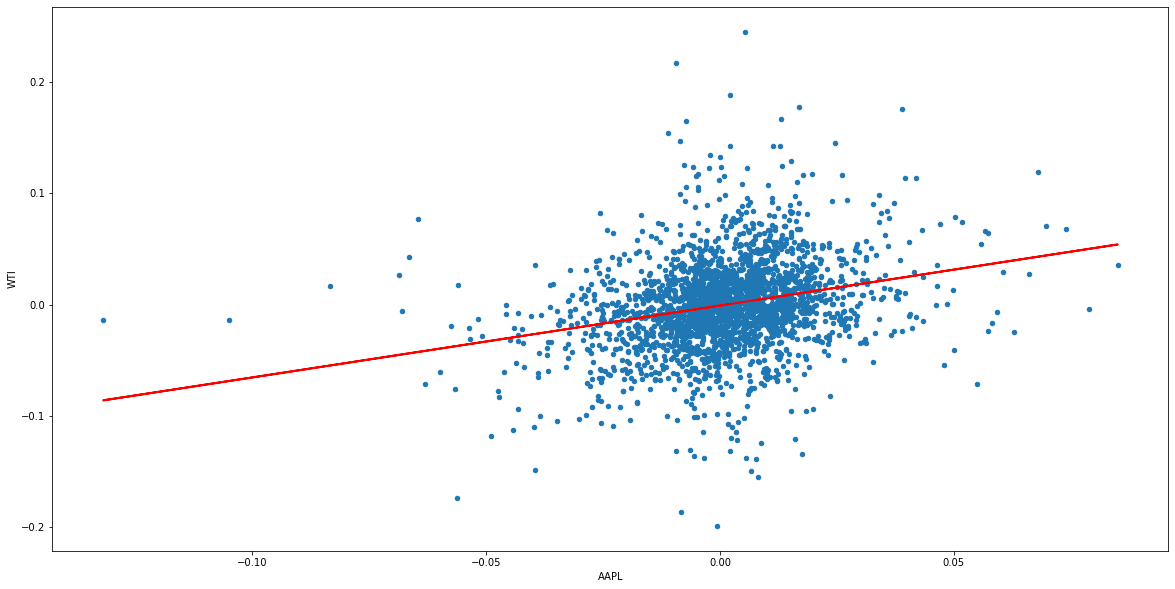

In [21]:
reg = np.polyfit(returns[stock1], returns[stock2], deg = 1)
ax = returns.plot(kind = "scatter", x = stock1, y = stock2, figsize = (20,10))
ax.plot(returns[stock1], np.polyval(reg, returns[stock1]), "r", lw = 2 );

There appears to be some type of positive correlation, howevever it is very apparent that this correlation isn't very strong

Calultaing Correlation

In [22]:
returns.corr()

,AAPL,WTI
AAPL,1.000000,0.260073
WTI,0.260073,1.000000


There is a correlation of 0.26, which in general is a weak correaltion as assumed from the graph above.

In the examples above, all the data for both stcks is considered when calculating correlation. 

Below, a rolling correlation we be created over a fixed window of time, i.e. 6 months (1/2 a year), in order to see if correlation is changing over time.

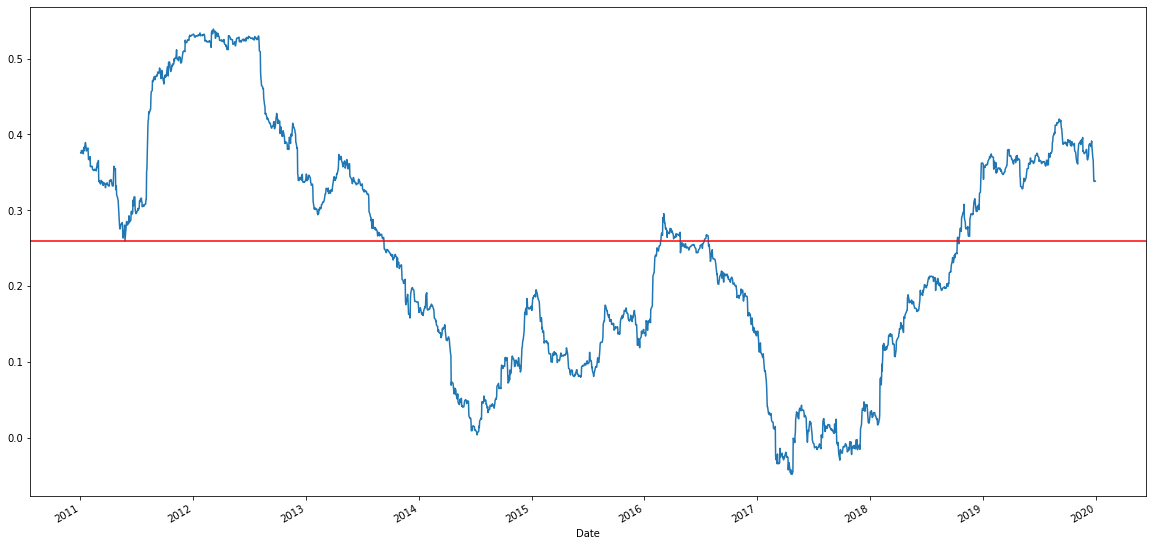

In [25]:
ax = returns[stock1].rolling(window = 252).corr(returns[stock2]).plot( figsize = (20,10))
ax.axhline(returns.corr().iloc[0,1], c="r");

The blue line shows the rolling correlation between the two stocks (Aaple and WTI), and the red line is the fixed correlation overall i.e. 0.26. The graph shows that the two stocks remain positively correlated until between 2017 - 2018.